# Coronovirus 

## Geographic Plotting

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [280]:
init_notebook_mode(connected=True) 

In [281]:
cv = pd.read_html("https://www.worldometers.info/coronavirus/")
codes = pd.read_html('https://www.iban.com/country-codes')

In [282]:
cvdf = cv[0]
cvdf = cvdf[:117]
codes = codes[0]

In [284]:
codes['Country'] = codes['Country'].replace('Netherlands (the)','Netherlands')
codes['Country'] = codes['Country'].replace('Philippines (the)','Philippines')
codes['Country'] = codes['Country'].replace('Dominican Republic (the)','Dominican Republic')
codes['Country'] = codes['Country'].replace('Holy See (the)','Vatican City')
codes['Country'] = codes['Country'].replace('Saint Barthélemy','St. Barth')
codes['Country'] = codes['Country'].replace('Faroe Islands (the)','Faeroe Islands')
codes['Country'] = codes['Country'].replace('Viet Nam','Vietnam')
codes['Country'] = codes['Country'].replace('Cayman Islands (the)','Channel Islands')
codes['Country'] = codes['Country'].replace('Saint Martin (French part)','Saint Martin')
codes['Country'] = codes['Country'].replace('Korea (the Republic of)','S. Korea')
codes['Country'] = codes['Country'].replace('United States of America (the)','USA')
codes['Country'] = codes['Country'].replace('United Kingdom of Great Britain and Northern Ireland (the)','UK')
codes['Country'] = codes['Country'].replace('Taiwan (Province of China)','Taiwan')
codes['Country'] = codes['Country'].replace('Iran (Islamic Republic of)','Iran')
codes['Country'] = codes['Country'].replace('United Arab Emirates (the)','UAE')
codes['Country'] = codes['Country'].replace('Viet Nam','Vietnam')
codes['Country'] = codes['Country'].replace('Moldova (the Republic of)','Moldova')
codes['Country'] = codes['Country'].replace('Congo (the Democratic Republic of the)','DRC')
codes['Country'] = codes['Country'].replace('Russian Federation (the)','Russia')
codes['Country'] = codes['Country'].replace('Palestine, State of','Palestine')
codes['Country'] = codes['Country'].replace('Republic of North Macedonia','North Macedonia')
codes['Country'] = codes['Country'].replace('Brunei Darussalam','Brunei')

In [285]:
codes = codes.set_index('Country')
cvdf = cvdf.set_index('Country,Other')
cvdf = cvdf.join(codes)
cvdf = cvdf.reset_index()
cvdf['Country'] = cvdf.copy()['Country,Other']

In [292]:
data = dict(
        type = 'choropleth',
        locations = cvdf['Alpha-3 code'],
        z = cvdf.iloc[:,6],
        text = cvdf['Country'],
        colorscale = 'reds',
        colorbar = {'title' : 'Active COVID-19 Cases'},
      ) 

In [293]:
layout = dict(
    title = 'Worldwide Coronovirus Cases',
    geo = dict(
        showframe = False,
        projection = {'type':'robinson'}
    )
)

In [294]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

## Coronovirus Survey
### Cleaning

In [27]:
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [116]:
### Import Data

data = pd.read_csv('MasterExcel2.csv')

In [117]:
### Clean Data & add Age/Age Groups columns, and binary columns for [Male, Female, Student, Retired, Employed, Not Employed]

data = data.replace({'1+2':1,'3+4':2,'5+6':3,'7+8':4,'9+10':5,'Self_employed':'Self-employed','Prefer not to say':'prefer_not_to_say'}) 
data['What is your employment status?'] = data['What is your employment status?'].str.capitalize() 
data['What is your gender?'] = data['What is your gender?'].str.capitalize()
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.capitalize() 
data['Age'] = 2020 - data['What year were you born?']
data['Age_groups'] = pd.cut(x=data['Age'], bins=[0, 24, 39, 54, 70, 100])
data[['Female','Male']] = pd.get_dummies(data['What is your gender?'])[['Female','Male']]
data[['Student','Retired']] = pd.get_dummies(data['What is your employment status?'])[['Student','Retired']]
employed = ['Employed full-time','Employed part-time','Employed_for_wages','Self-employed']
not_employed = ['Homemaker','Not employed','Unemployed_looking','Unable_to_work','Student','Retired','Homemaker']
data['Employed'] = 0
data['Not Employed'] = 0
for x in enumerate(data['What is your employment status?']):
    for y in employed:
        if y == x[1]:
            data.loc[x[0],'Employed'] = 1
for x in enumerate(data['What is your employment status?']):
    for y in not_employed:
        if y == x[1]:
            data.loc[x[0],'Not Employed'] = 1

In [118]:
# Clean up answer choices from different surveys for Ethnicity

data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('White','Caucasian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Hispanic/latinx','Hispanic')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Latino','Hispanic')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Hispanic/latinx','Hispanic')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Black/african american','Black')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, asian/asian american','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, hispanic/latinx','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Asian/asian american','Asian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Asian, other','Asian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, jewish','Caucasian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, asian','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Multiracial/asian american','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Arab','Asian')

In [ ]:
'''
### Clean up Income data (still not sure how to do this)
data['What is your income?2'] = data['What is your income?'].copy()

data['What is your income?2'] = data['What is your income?2'].str.replace('Less than $25,000','<$25,000')
data['What is your income?2'] = data['What is your income?2'].str.replace('Between $25,000 and $49,999','$25,000-$49,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('Between $75,000 and $99,999','$75,000-$99,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('Between $100,000 and $124,999','$100,000-$124,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('Between $125,000 and $149,999','$125,000-$149,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('Between $150,000 and $199,000','>$150,000')
data['What is your income?2'] = data['What is your income?2'].str.replace('More than $200,000','>$150,000')

data['What is your income?2'] = data['What is your income?2'].str.replace('high_i','$100,000-$124,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('high_ii','$125,000-$149,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('high_iii','>$150,000')
data['What is your income?2'] = data['What is your income?2'].str.replace('middle_i','$50,000-$74,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('middle_ii','$75,000-$99,999')
data['What is your income?2'] = data['What is your income?2'].str.replace('lower_i','<$25,000')
data['What is your income?2'] = data['What is your income?2'].str.replace('lower_ii','$25,000-$49,999')
'''

In [ ]:
incomelist = data['What is your income?']
incomelist2 = []
for x in incomelist:
    x1 = str(x)
    x1 = x1.replace('Less than $25,000','<$25,000')
    x1 = x1.replace('Between $25,000 and $49,999','$25,000-$49,999')
    x1 = x1.replace('Between $75,000 and $99,999','$75,000-$99,999')
    x1 = x1.replace('Between $100,000 and $124,999','$100,000-$124,999')
    x1 = x1.replace('Between $125,000 and $149,999','$125,000-$149,999')
    x1 = x1.replace('Between $150,000 and $199,000','>$150,000')
    x1 = x1.replace('More than $200,000','>$150,000')
    x1 = x1.replace('high_iii','>$150,000')
    x1 = x1.replace('high_ii','$125,000-$149,999')
    x1 = x1.replace('high_i','$100,000-$124,999')
    x1 = x1.replace('middle_ii','$75,000-$99,999')
    x1 = x1.replace('middle_i','$50,000-$74,999')
    x1 = x1.replace('lower_ii','$25,000-$49,999')
    x1 = x1.replace('lower_i','<$25,000')
    print (x1)
    incomelist2.append(x1)
data['income_group'] = incomelist2


In [121]:
### Seperate "last 48 hours" question and create columns for each possible answer choice,
### value = 1 indicates answer choice chosen, value = 0 indicates answer choice not selected

last48hrs = re.split(r', (?=[A-Z])',data.iloc[175,9])
last48hrs.append('Shook hands with anyone outside of my household')
last48hrs.append('Attended in-person gatherings of 50 people')
last48hrs.append('Ate at a restaurant')
for x in last48hrs:
    data[x] = 0
for x in enumerate(data.iloc[:,9]):
    for y in last48hrs:
        if y in x[1]:
            data.loc[x[0],y] = 1

In [122]:
### Seperate "loved ones affected" question and create columns for each possible answer choice,
### value = 1 indicates answer choice chosen, value = 0 indicates answer choice not selected

loved_ones_aff = ['Yes, due to their age (60+)','Yes, due to existing medical conditions (Diabetes, heart disease, lung disease)','Yes, they live in areas affected by COVID-19 (parts of the USA, China, Italy, Korea, etc)','No',"I don't know"]
for x in loved_ones_aff:
    data[x] = 0
for x in enumerate(data.iloc[:,8]):
    for y in loved_ones_aff:
        if y in x[1]:
            data.loc[x[0],y] = 1

In [ ]:
### Rename Columns

for x in last48hrs:
    data.rename(columns = {x:'In the past 48 hours: '+x}, inplace = True) 
for x in loved_ones_aff:
    data.rename(columns = {x:'Loved ones affected? - '+x}, inplace = True) 

In [123]:
data.rename(columns = {'Rescheduled or canceled non-critical in-person gatherings and appointments (e.g. birthday parties, concerts, museums, annual checkups, spa, social dinners)':'Rescheduled or canceled non-critical in-person gatherings and appointments'}, inplace = True) 

In [ ]:
data.groupby('How are you doing financially today, compared to a year ago?')['Not Employed'].sum()

### Plotting

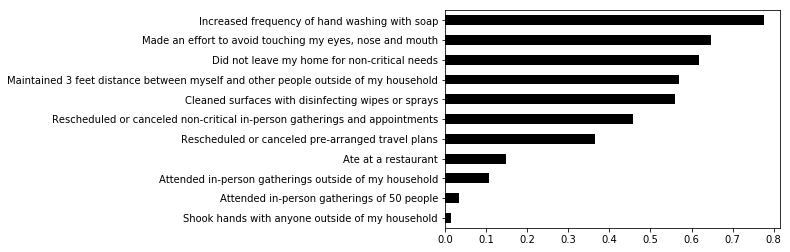

In [374]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

last48 = data.iloc[:,25:36].mean().sort_values()
last48.plot(kind='barh',color='Black')

In [375]:
def piechart(series):    
    labels = ['Yes','No']
    explode = (0, 0.05)  # only "explode" the "No" slice 
    fig1, ax1 = plt.subplots()
    ax1.pie(series.value_counts(), labels=labels, explode=explode, autopct='%1.1f%%',
            shadow=False,startangle=180, colors = ['Silver','Grey'],pctdistance=.5,labeldistance=.68)
    ax1.axis('equal')
    csfont = {'fontname':'Calibri'}
    plt.title(re.sub('^Yes,', 'Loved ones affected -',series.name),**csfont)
    direc = 'COVID-19_Images'
    plt.savefig(direc+'/'+series.name+'.png')


In [ ]:
for cols in data.iloc[:,25:39].columns:
    piechart(data[cols])

[(0, 1),
 Text(0, 0.5, 'Did not leave my home for non-critical needs'),
 Text(0.5, 1.0, 'In the Last 48 Hours:')]

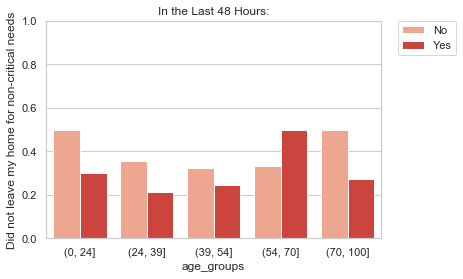

In [259]:
### Age Groups x In last 48 hours

sns.set(style="whitegrid")

ax = sns.barplot(x="age_groups",y="No",ci=None,palette='Reds',data=data,hue='Did not leave my home for non-critical needs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=('No','Yes'))
ax.set(ylabel='Did not leave my home for non-critical needs',title='In the Last 48 Hours:',ylim=[0,1])


## Bokeh Interactive Plotting

In [270]:
from bokeh.plotting import figure,output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [ ]:
weeks = data['How many WEEKS do you think it’ll take before your daily life returns to normal?']
eth = data['What is your ethnicity?']
output_file('index.html')
source = ColumnDataSource(data)
eths = list(set(source.data['What is your ethnicity?'].tolist()))
print (eths)
#Add Plot
p = figure(y_range=eths,
           x_axis_label='Weeks',
           y_axis_label='Ethnicity',
           plot_width = 800,
           plot_height = 600,
           title='Weeks before daily life returns by Ethnicity'
          )

p.hbar(y='What is your ethnicity?',source=source,right='How many WEEKS do you think it’ll take before your daily life returns to normal?',left=0,height=.4,color='green',fill_alpha=.5)


#hover = HoverTool()
#hover.tooltips=[('',''),('',''),('',''),('',''),]
#p.add_tools(hover)

show(p)

# Plotly Interactive Plotting

In [1]:
data.columns

NameError: name 'data' is not defined

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=['Product A', 'Product B', 'Product C'],
    y=[20, 14, 23],
    text=['27% market share', '24% market share', '19% market share'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='January 2013 Sales Report',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')